#Mini Projet : Construction d’un modèle pour la prédiction de la puissance solaire photovoltaïque (PV) en utilisant les réseaux de Neurones artificiels


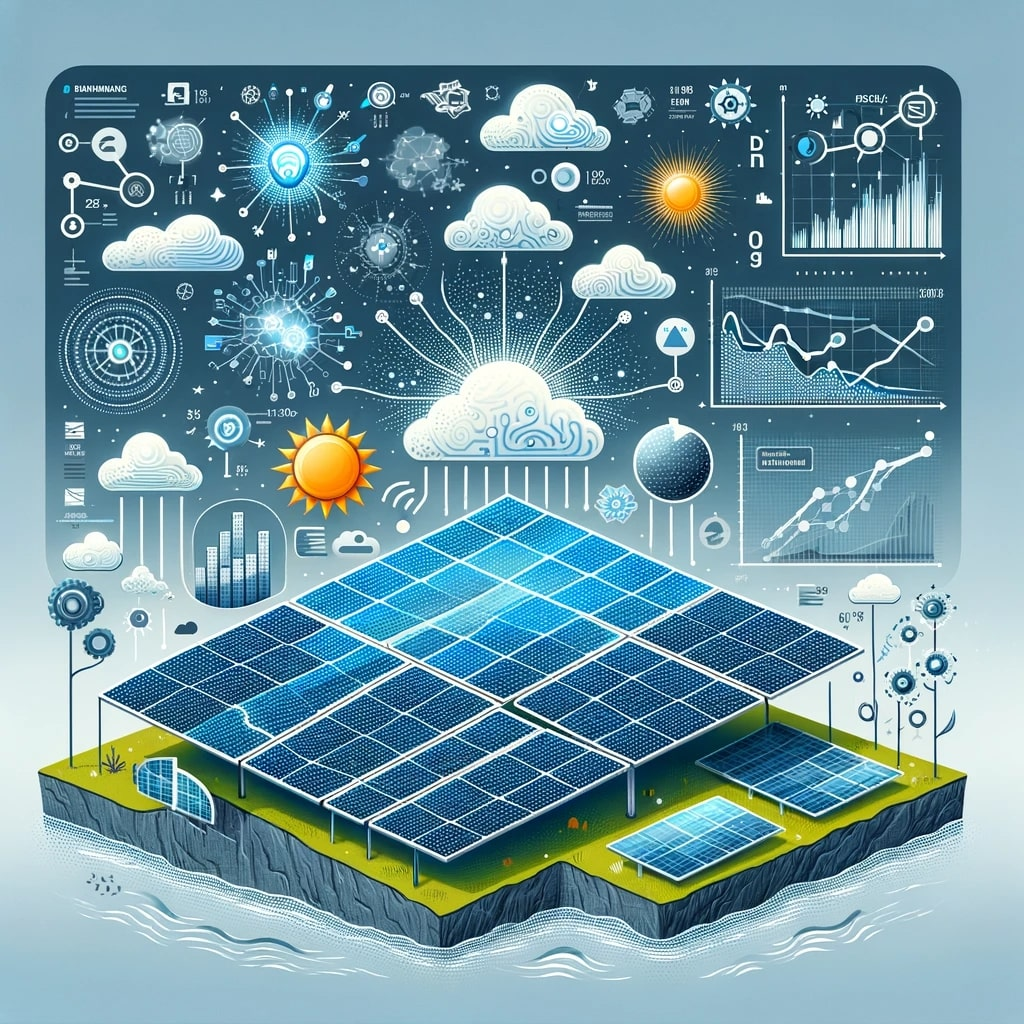


Groupe de projet :

*   EL ANSARI Mostapha
*   ELHOUARI Nada
*   LOZI Adam





In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

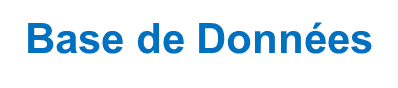

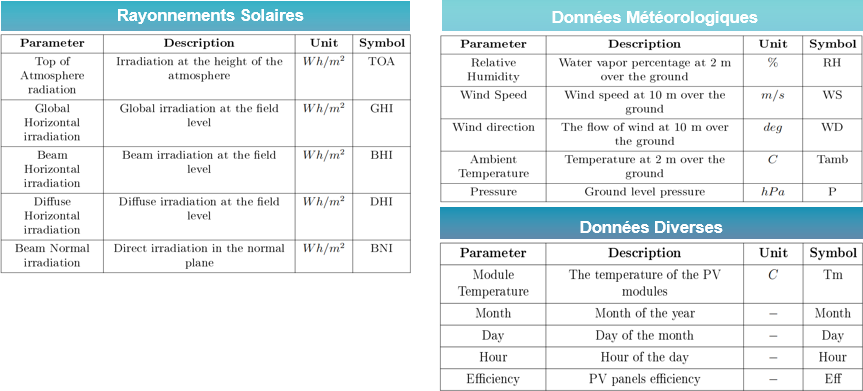

**Importer la base de données**

In [ ]:
data = pd.read_csv('data.txt', sep='\t')
data.head()

,Month,Day,Hour,PAC,Tm,Eff,Tamb,RH,P,WS,WD,TOA,GHI,BHI,DHI,BNI
0,1,1,10,3802.507576,42.347879,98.894697,14.50,58.81,1017.53,3.15,203.14,6181.305,4278.672,3391.175,887.496,7709.750
1,1,1,11,3059.995455,55.044545,98.122879,15.98,54.94,1017.73,2.11,226.10,7261.285,5195.536,4223.724,971.812,8186.512
2,1,1,12,5104.446970,67.297576,98.311212,17.46,50.24,1017.30,1.52,263.35,7637.228,5525.204,4534.102,991.102,8357.933
3,1,1,13,5095.312121,77.016667,98.223939,18.24,48.56,1016.64,1.66,292.72,7283.514,5236.036,4280.465,955.572,8271.674
4,1,1,14,4968.204545,80.223030,98.381667,18.45,48.91,1016.31,2.01,311.29,6224.230,4346.761,3473.797,872.963,7844.699


**Data exploration**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9394 entries, 0 to 9393
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   9394 non-null   int64  
 1   Day     9394 non-null   int64  
 2   Hour    9394 non-null   int64  
 3   PAC     9394 non-null   float64
 4   Tm      9394 non-null   float64
 5   Eff     9394 non-null   float64
 6   Tamb    9394 non-null   float64
 7   RH      9394 non-null   float64
 8   P       9394 non-null   float64
 9   WS      9394 non-null   float64
 10  WD      9394 non-null   float64
 11  TOA     9394 non-null   float64
 12  GHI     9394 non-null   float64
 13  BHI     9394 non-null   float64
 14  DHI     9394 non-null   float64
 15  BNI     9394 non-null   float64
dtypes: float64(13), int64(3)
memory usage: 1.1 MB


In [ ]:
data.describe()

,Month,Day,Hour,PAC,Tm,Eff,Tamb,RH,P,WS,WD,TOA,GHI,BHI,DHI,BNI
count,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.00000,9394.000000
mean,6.385246,15.540026,11.844049,2728.996212,56.293230,84.898254,19.577275,67.353288,1004.447211,3.916397,228.037244,6264.484603,3773.160933,2582.836476,1191.19292,4121.850071
std,3.286536,8.749525,3.974937,2115.746883,25.588611,32.470833,4.828761,14.330914,4.877227,2.181048,116.200159,4035.607486,3006.480785,2559.752251,856.35780,3184.695110
min,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,7.160000,20.430000,983.420000,0.030000,0.010000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,4.000000,8.000000,8.000000,442.413345,44.344811,98.240121,15.940000,57.170000,1001.430000,2.260000,141.555000,2622.576000,969.443750,161.062750,581.24750,599.089500
50%,6.000000,15.000000,12.000000,2791.191526,62.983697,98.615781,19.270000,66.320000,1003.970000,3.740000,271.980000,6712.258000,3354.455000,1809.398500,1120.70050,4315.431500
75%,9.000000,23.000000,15.000000,4861.013259,77.606250,99.475998,23.140000,78.160000,1006.970000,5.170000,322.835000,9706.918750,6209.692000,4556.224500,1622.59000,7176.257000
max,12.000000,31.000000,20.000000,6124.527273,87.066667,100.000000,37.800000,102.920000,1022.060000,17.570000,359.970000,12939.077000,10476.982000,9027.593000,4124.90900,9633.553000


In [ ]:
print( 'Shape of DataFrame: {}'.format(data.shape))
print (data.loc[1])

Shape of DataFrame: (9394, 16)
Month       1.000000
Day         1.000000
Hour       11.000000
PAC      3059.995455
Tm         55.044545
Eff        98.122879
Tamb       15.980000
RH         54.940000
P        1017.730000
WS          2.110000
WD        226.100000
TOA      7261.285000
GHI      5195.536000
BHI      4223.724000
DHI       971.812000
BNI      8186.512000
Name: 1, dtype: float64


In [ ]:
# Calculer les cellules vides
total_nan_count = data.isna().sum().sum()
print(f'Le nombre totale des cellulles vides dans la DataFrame toutes entier:{total_nan_count}')

Le nombre totale des cellulles vides dans la DataFrame toutes entier:0


**Visualisation des données**

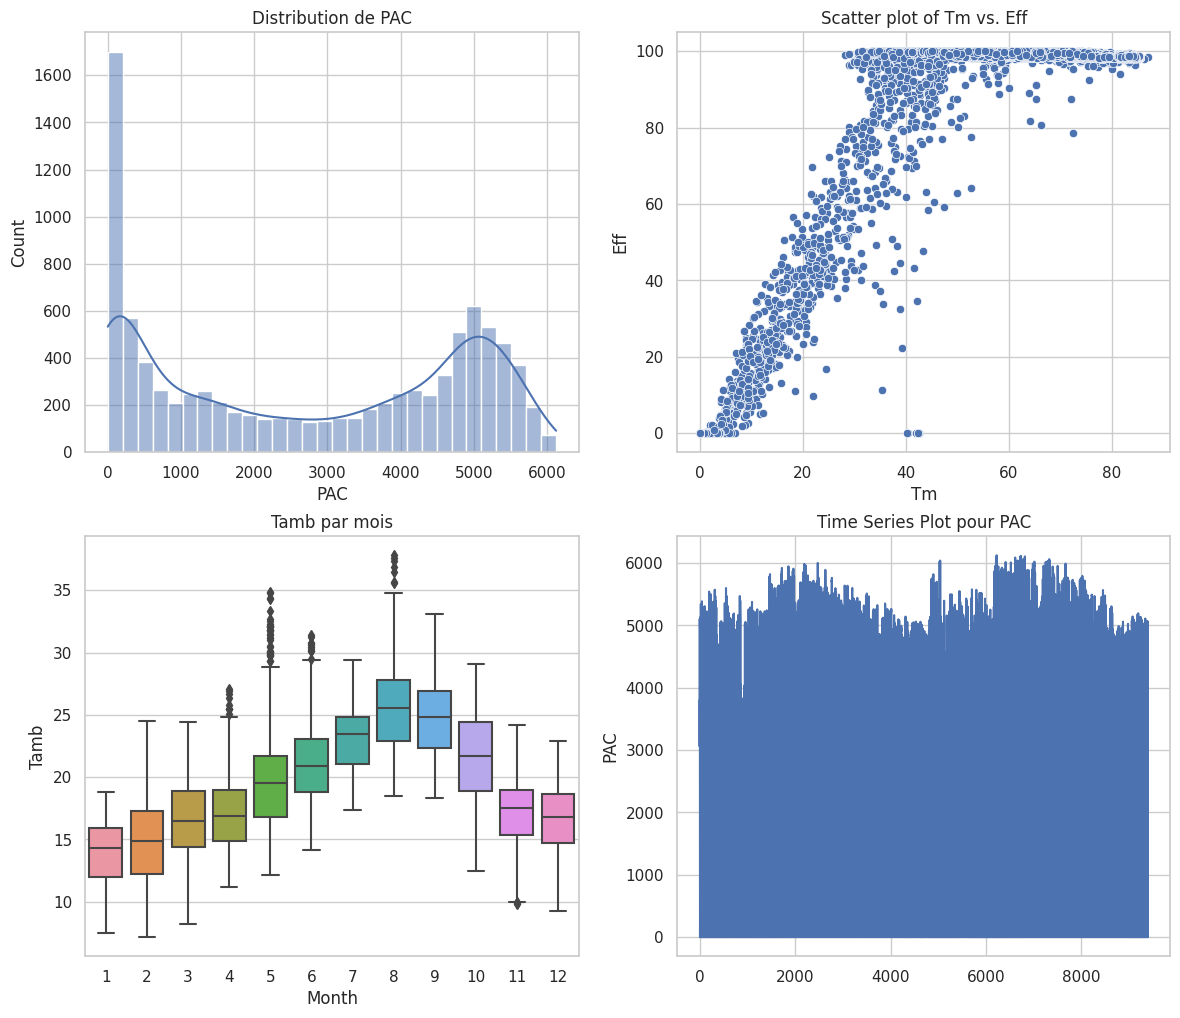

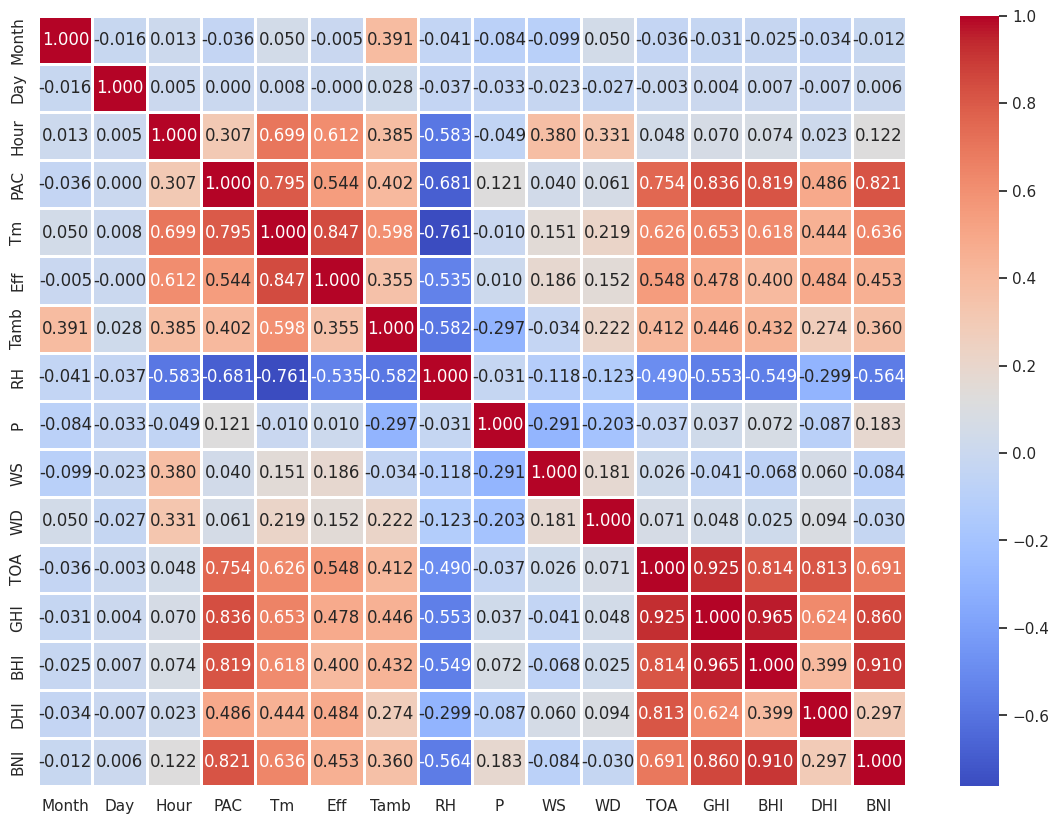

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

sns.histplot(data['PAC'], bins=30, kde=True, ax=axes[0, 0]).set_title('Distribution de PAC')
sns.scatterplot(x='Tm', y='Eff', data=data, ax=axes[0, 1]).set_title('Scatter plot of Tm vs. Eff')
sns.boxplot(x='Month', y='Tamb', data=data, ax=axes[1, 0]).set_title('Tamb par mois')
sns.lineplot(x=data.index, y='PAC', data=data, ax=axes[1, 1]).set_title('Time Series Plot pour PAC')

plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.3f', linewidths=2)
plt.show()

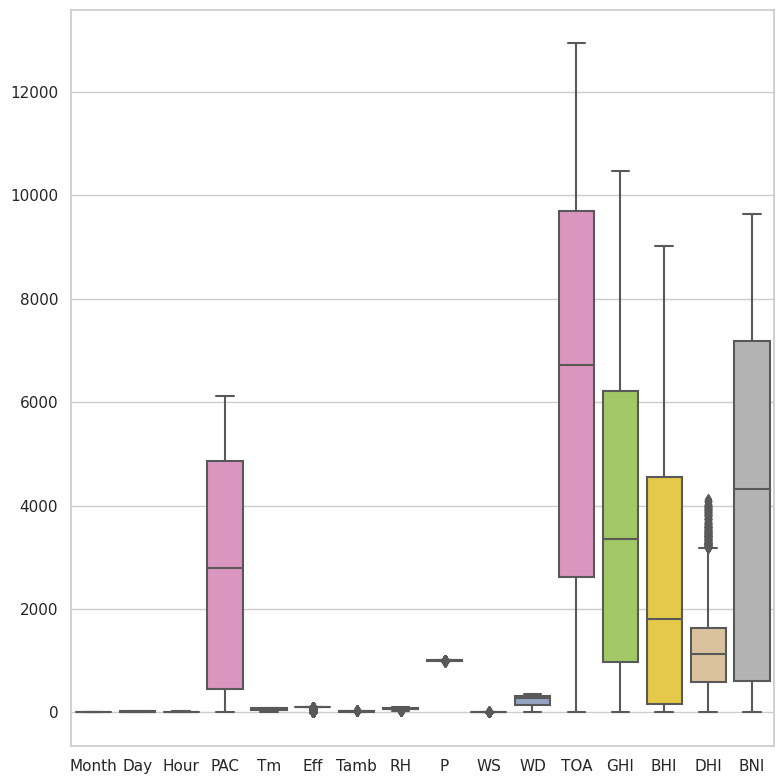

In [ ]:
# Configurer la figure matplotlib
plt.figure(figsize=(8, 8))

# Utiliser un boxplot seaborn
sns.boxplot(data=data, palette='Set2')

# Ajuster la disposition pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()


**Division des données**

In [ ]:
target_variable = 'PAC'
input_features = ['Month', 'Day', 'Hour', 'Tm', 'Eff', 'Tamb', 'RH', 'P', 'WS', 'WD', 'TOA', 'GHI', 'BHI', 'DHI', 'BNI']

In [ ]:
X = data[input_features]
y = data[target_variable]

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.mean()

Month       6.392947
Day        15.533200
Hour       11.865469
Tm         56.322178
Eff        84.830449
Tamb       19.606982
RH         67.273743
P        1004.432161
WS          3.933132
WD        227.814717
TOA      6273.807769
GHI      3771.936256
BHI      2575.626350
DHI      1197.149126
BNI      4103.490575
dtype: float64

**Normalisation des Données pour le Modèle de Prédiction**

\
**Normalisation Min-Max Scaling**

La Normalisation Min-Max Scaling peut- être appliqué quand les données varient dans des échelles différentes. A l'issue de cette transformation, les variables seront comprises dans un intervalle fixe [0,1]. Le but d'avoir un tel intervalle restreint est de réduire l'espace de variation des valeurs d'une feature et par conséquent réduire l'effet des outliers.

La normalisation peut- être effectuée par la technique du Min-Max Scaling. La transformation se fait grâce à la formule suivante :
$$
X_{\text {normalise }}=\frac{X-X_{\min }}{X_{\max }-X_{\min }}
$$

Avec:
- $X_{\min }$ : la plus petite valeur observée pour la feature $\mathrm{X}$
- $X_{\min }$ : la plus grande valeur observée pour la feature $X$
- $X$ : La valeur de la feature qu'on cherche à normaliser

Cette technique est probablement la plus connue elle fonctionne surtout bien pour les cas où la distribution n'est pas gaussienne.

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(64, input_dim=15, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Mean Absolute Error on Test Set: {mae}')

Epoch 1/50
188/188 - 1s - loss: 11495393.0000 - mae: 2671.4912 - val_loss: 10600212.0000 - val_mae: 2546.7588 - 1s/epoch - 7ms/step
Epoch 2/50
188/188 - 0s - loss: 7217640.0000 - mae: 2116.9761 - val_loss: 4024753.2500 - val_mae: 1731.0774 - 393ms/epoch - 2ms/step
Epoch 3/50
188/188 - 0s - loss: 2690467.7500 - mae: 1479.4802 - val_loss: 2255594.2500 - val_mae: 1380.5209 - 386ms/epoch - 2ms/step
Epoch 4/50
188/188 - 0s - loss: 1932021.6250 - mae: 1258.8613 - val_loss: 1766894.1250 - val_mae: 1197.5925 - 374ms/epoch - 2ms/step
Epoch 5/50
188/188 - 0s - loss: 1481581.0000 - mae: 1073.0974 - val_loss: 1362336.7500 - val_mae: 1004.8067 - 365ms/epoch - 2ms/step
Epoch 6/50
188/188 - 0s - loss: 1138348.7500 - mae: 888.1082 - val_loss: 1098588.1250 - val_mae: 842.3882 - 457ms/epoch - 2ms/step
Epoch 7/50
188/188 - 0s - loss: 948150.5000 - mae: 773.2699 - val_loss: 973620.1875 - val_mae: 777.6837 - 380ms/epoch - 2ms/step
Epoch 8/50
188/188 - 0s - loss: 858420.3125 - mae: 725.0042 - val_loss: 9127

**Réglage des hyperparamètres à l'aide d'une grille de recherche**

In [ ]:
units_list = [32, 64, 128]
hidden_layers_list = [1, 2]
batch_size_list = [32, 64]
epochs_list = [10, 20]

results_df = pd.DataFrame(columns=['Units', 'Hidden Layers', 'Batch Size', 'Epochs', 'Training Time', 'MAE'])

for units in units_list:
    for hidden_layers in hidden_layers_list:
        for batch_size in batch_size_list:
            for epochs in epochs_list:
                model = Sequential([
                    Dense(units, input_dim=15, activation='relu'),
                    * [Dense(units, activation='relu') for _ in range(hidden_layers - 1)],
                    Dense(1, activation='linear')
                ])

                model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

                start_time = time.time()
                model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                training_time = time.time() - start_time

                _, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
                results_df = results_df.append({
                    'Units': units, 'Hidden Layers': hidden_layers,
                    'Batch Size': batch_size, 'Epochs': epochs,
                    'Training Time': training_time, 'MAE': mae
                }, ignore_index=True)

<ipython-input-66-9590326e236b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-66-9590326e236b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-66-9590326e236b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-66-9590326e236b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-66-9590326e236b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

In [ ]:
results_df

,Units,Hidden Layers,Batch Size,Epochs,Training Time,MAE
0,32.0,1.0,32.0,10.0,3.817495,1840.625488
1,32.0,1.0,32.0,20.0,10.781478,1237.927979
2,32.0,1.0,64.0,10.0,2.211881,2405.630127
3,32.0,1.0,64.0,20.0,3.846429,1844.717773
4,32.0,2.0,32.0,10.0,5.799018,739.544556
5,32.0,2.0,32.0,20.0,10.933180,561.198853
6,32.0,2.0,64.0,10.0,3.269980,805.850159
7,32.0,2.0,64.0,20.0,4.347731,692.580627
8,64.0,1.0,32.0,10.0,5.674216,1526.709717
9,64.0,1.0,32.0,20.0,11.828969,945.157715


In [ ]:
# Exemple de grille de paramètres
param_grid = {
    'units': [50, 100, 150],
    'hidden_layers': [1, 2, 3],
    'batch_size': [10, 20, 30],
    'epochs': [10, 20, 30]
}

# Initialisation du DataFrame pour enregistrer les résultats
results_df = pd.DataFrame(columns=['Units', 'Hidden_Layers', 'Batch_Size', 'Epochs', 'MAE', 'Training_Time'])

# Boucle pour expérimenter avec chaque combinaison de paramètres
for units in param_grid['units']:
    for hidden_layers in param_grid['hidden_layers']:
        for batch_size in param_grid['batch_size']:
            for epochs in param_grid['epochs']:
                model = Sequential()
                model.add(Dense(units, input_dim=15, activation='relu'))
                for _ in range(hidden_layers - 1):
                    model.add(Dense(units, activation='relu'))
                model.add(Dense(1, activation='linear'))
                model.compile(loss='mean_squared_error', optimizer='adam')

                start_time = time.time()
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                training_time = time.time() - start_time

                # Évaluer le modèle sur l'ensemble de test et extraire le MAE
                mae = model.evaluate(X_test, y_test, verbose=0)

                results_df = results_df.append({
                    'Units': units, 'Hidden_Layers': hidden_layers,
                    'Batch_Size': batch_size, 'Epochs': epochs,
                    'MAE': mae, 'Training_Time': training_time
                }, ignore_index=True)

# Analyse des résultats
best_score = results_df[results_df['MAE'] == results_df['MAE'].min()]
shortest_training_time = results_df[results_df['Training_Time'] == results_df['Training_Time'].min()]

print("Meilleur Score de Prédiction (Moindre MAE):\n", best_score)
print("Durée d'Entraînement la Plus Courte:\n", shortest_training_time)


<ipython-input-68-fdf4c9e1dc05>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-68-fdf4c9e1dc05>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-68-fdf4c9e1dc05>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-68-fdf4c9e1dc05>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-68-fdf4c9e1dc05>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

Meilleur Score de Prédiction (Moindre MAE):
     Units  Hidden_Layers  Batch_Size  Epochs           MAE  Training_Time
80  150.0            3.0        30.0    30.0  376607.03125      16.466776
Durée d'Entraînement la Plus Courte:
     Units  Hidden_Layers  Batch_Size  Epochs          MAE  Training_Time
69  150.0            2.0        30.0    10.0  608557.1875       4.665896


<ipython-input-68-fdf4c9e1dc05>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [ ]:
results_df

,Units,Hidden_Layers,Batch_Size,Epochs,MAE,Training_Time
0,50.0,1.0,10.0,10.0,654888.56250,10.802127
1,50.0,1.0,10.0,20.0,582778.25000,22.855587
2,50.0,1.0,10.0,30.0,497216.46875,35.331524
3,50.0,1.0,20.0,10.0,800299.06250,5.650803
4,50.0,1.0,20.0,20.0,611427.31250,11.691828
5,50.0,1.0,20.0,30.0,491301.28125,20.985738
6,50.0,1.0,30.0,10.0,816398.87500,4.750472
7,50.0,1.0,30.0,20.0,664448.50000,7.348225
8,50.0,1.0,30.0,30.0,524060.37500,21.256405
9,50.0,2.0,10.0,10.0,495751.62500,21.145159


In [ ]:
# Exemple de grille de paramètres
param_grid = {
    'units': [50, 100, 150],
    'hidden_layers': [1, 2, 3],
    'batch_size': [10, 20, 30],
    'epochs': [10, 20, 30]
}

# Initialisation du DataFrame pour enregistrer les résultats
results_df = pd.DataFrame(columns=['Units', 'Hidden_Layers', 'Batch_Size', 'Epochs', 'MAE', 'R-Squared', 'MAPE', 'Training_Time'])

# Boucle pour expérimenter avec chaque combinaison de paramètres
for units in param_grid['units']:
    for hidden_layers in param_grid['hidden_layers']:
        for batch_size in param_grid['batch_size']:
            for epochs in param_grid['epochs']:
                model = Sequential()
                model.add(Dense(units, input_dim=15, activation='relu'))
                for _ in range(hidden_layers - 1):
                    model.add(Dense(units, activation='relu'))
                model.add(Dense(1, activation='linear'))
                model.compile(loss='mean_squared_error', optimizer='adam')

                start_time = time.time()
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                training_time = time.time() - start_time

                # Évaluer le modèle sur l'ensemble de test et extraire MAE, R-Squared et MAPE
                y_pred = model.predict(X_test)
                mae = mean_absolute_error(y_test, y_pred)
                r2_squared = r2_score(y_test, y_pred)

                # Utilisation de la fonction mean_absolute_percentage_error
                mape = mean_absolute_percentage_error(y_test, y_pred)

                results_df = results_df.append({
                    'Units': units, 'Hidden_Layers': hidden_layers,
                    'Batch_Size': batch_size, 'Epochs': epochs,
                    'MAE': mae, 'R-Squared': r2_squared,
                    'MAPE': mape, 'Training_Time': training_time
                }, ignore_index=True)

# Analyse des résultats
best_score = results_df[results_df['MAE'] == results_df['MAE'].min()]
shortest_training_time = results_df[results_df['Training_Time'] == results_df['Training_Time'].min()]

print("Best Prediction Score (Lowest MAE):\n", best_score)
print("Shortest Training Time:\n", shortest_training_time)


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 1ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


59/59 [==============================] - 0s 2ms/step
Best Prediction Score (Lowest MAE):
     Units  Hidden_Layers  Batch_Size  Epochs         MAE  R-Squared  \
47  100.0            3.0        10.0    30.0  396.725739   0.917581   

            MAPE  Training_Time  
47  2.173648e+16      41.823499  
Shortest Training Time:
     Units  Hidden_Layers  Batch_Size  Epochs         MAE  R-Squared  \
30  100.0            1.0        20.0    10.0  612.177037     0.8496   

            MAPE  Training_Time  
30  1.101283e+17       5.652011  


<ipython-input-89-9aad5f171431>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


# Q.2

In [ ]:
results_df

,Units,Hidden_Layers,Batch_Size,Epochs,MAE,R-Squared,MAPE,Training_Time
0,50.0,1.0,10.0,10.0,610.160913,0.844435,1.128955e+17,22.997420
1,50.0,1.0,10.0,20.0,521.426100,0.878091,7.873172e+16,41.481526
2,50.0,1.0,10.0,30.0,483.513698,0.893324,6.316035e+16,35.273902
3,50.0,1.0,20.0,10.0,635.859772,0.833756,1.147223e+17,10.765334
4,50.0,1.0,20.0,20.0,537.834597,0.873641,8.055822e+16,11.104433
...,...,...,...,...,...,...,...,...
76,150.0,3.0,20.0,20.0,432.983680,0.904635,2.445779e+16,21.288517
77,150.0,3.0,20.0,30.0,402.585181,0.914521,1.629656e+16,22.879585
78,150.0,3.0,30.0,10.0,492.302125,0.884161,3.273624e+16,5.910734
79,150.0,3.0,30.0,20.0,436.480832,0.894704,1.498412e+16,11.068380


# Q.3

In [ ]:
# Analyze the results
best_score = results_df[results_df['MAE'] == results_df['MAE'].min()]
shortest_training_time = results_df[results_df['Training_Time'] == results_df['Training_Time'].min()]

print("Best Prediction Score (Lowest MAE):\n", best_score)
print("Shortest Training Time:\n", shortest_training_time)


Best Prediction Score (Lowest MAE):
     Units  Hidden_Layers  Batch_Size  Epochs         MAE  R-Squared  \
47  100.0            3.0        10.0    30.0  396.725739   0.917581   

            MAPE  Training_Time  
47  2.173648e+16      41.823499  
Shortest Training Time:
     Units  Hidden_Layers  Batch_Size  Epochs         MAE  R-Squared  \
30  100.0            1.0        20.0    10.0  612.177037     0.8496   

            MAPE  Training_Time  
30  1.101283e+17       5.652011  


In [ ]:
#extraction MAE, R-Squared, and mape
mae = best_score['MAE'].values[0]
r_squared = best_score['R-Squared'].values[0]
mape = best_score['MAPE'].values[0]

**Calculer R²**

In [ ]:
print("R-square (R²):", r_squared)

R-square (R²): 0.9175805525595301


**Calculer MAPE**

In [ ]:
print('Mean Absolute Percentage Error (MAPE):',mape)

Mean Absolute Percentage Error (MAPE): 2.173647663400642e+16


# Q.4

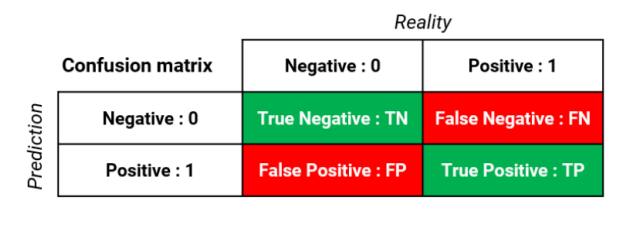

In [ ]:
correlation_matrix = data.corr()
selected_features = correlation_matrix.loc[correlation_matrix[target_variable].abs() > 0.5, target_variable].index.tolist()

In [ ]:
print("Selected Features based on Correlation:")
print(selected_features)

Selected Features based on Correlation:
['PAC', 'Tm', 'Eff', 'RH', 'TOA', 'GHI', 'BHI', 'BNI']


In [ ]:
X_selected = data[selected_features]
y_selected = data[target_variable]

In [ ]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

In [ ]:
scaler_selected = MinMaxScaler()

In [ ]:
X_train_scaled_selected = scaler_selected.fit_transform(X_train_selected)
X_test_scaled_selected = scaler_selected.transform(X_test_selected)

In [ ]:
model_selected = Sequential([
    Dense(64, input_dim=len(selected_features), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])


In [ ]:
model_selected.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
model_selected.fit(X_train_scaled_selected, y_train_selected, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/50
188/188 - 1s - loss: 11656834.0000 - mae: 2693.4648 - val_loss: 11259138.0000 - val_mae: 2637.6370 - 1s/epoch - 6ms/step
Epoch 2/50
188/188 - 0s - loss: 8874603.0000 - mae: 2320.9758 - val_loss: 6081171.5000 - val_mae: 1956.4033 - 377ms/epoch - 2ms/step
Epoch 3/50
188/188 - 0s - loss: 3371498.2500 - mae: 1515.1771 - val_loss: 1806900.1250 - val_mae: 1229.2979 - 386ms/epoch - 2ms/step
Epoch 4/50
188/188 - 0s - loss: 1366674.8750 - mae: 1053.2222 - val_loss: 1193072.1250 - val_mae: 967.0883 - 362ms/epoch - 2ms/step
Epoch 5/50
188/188 - 0s - loss: 975860.5000 - mae: 853.0818 - val_loss: 886648.5625 - val_mae: 792.5466 - 455ms/epoch - 2ms/step
Epoch 6/50
188/188 - 0s - loss: 712177.3750 - mae: 689.8868 - val_loss: 663073.1875 - val_mae: 642.3985 - 370ms/epoch - 2ms/step
Epoch 7/50
188/188 - 0s - loss: 541166.0625 - mae: 574.3320 - val_loss: 531971.1875 - val_mae: 564.3657 - 475ms/epoch - 3ms/step
Epoch 8/50
188/188 - 1s - loss: 444698.8125 - mae: 512.6727 - val_loss: 453206.5625

In [ ]:
loss_selected, mae_selected = model_selected.evaluate(X_test_scaled_selected, y_test_selected, verbose=0)
print(f'Erreur absolue moyenne sur l\'ensemble de test avec les caractéristiques sélectionnées : {mae_selected}')

Mean Absolute Error on Test Set with Selected Features: 5.019850254058838


**Predicting with the model**

In [ ]:
y_pred = model.predict(X_test)

59/59 [==============================] - 0s 2ms/step


**Calculer R²**

In [ ]:
r_square = r2_score(y_test, y_pred)
print("R-square (R²):", r_square)

R-square (R²): 0.8986263038427094


**Calculer MAPE**

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):',mape)

Mean Absolute Percentage Error (MAPE): 1.476063884751423e+16


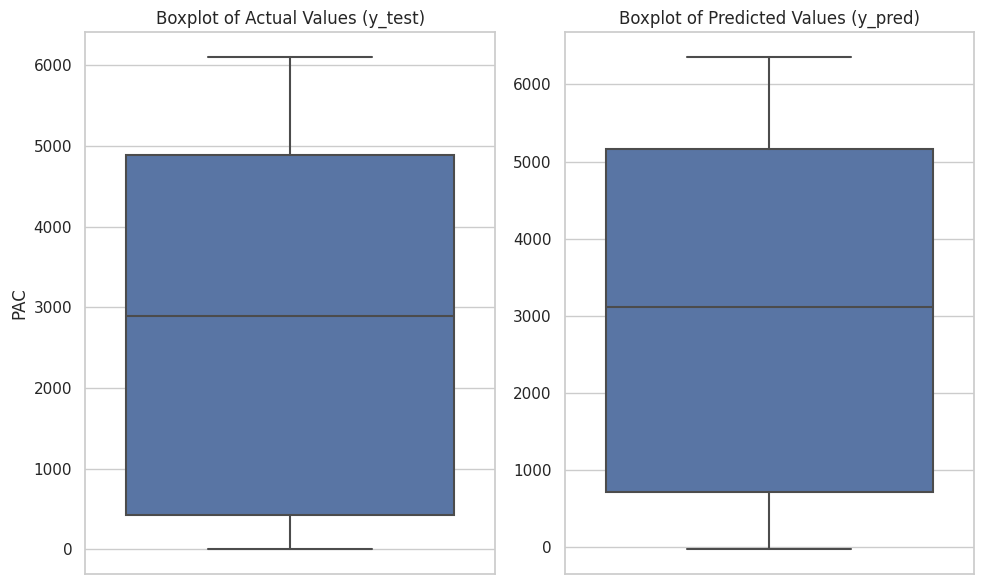

In [ ]:

y_pred_flat = y_pred.flatten()


plt.figure(figsize=(10, 6))


plt.subplot(1, 2, 1)
sns.boxplot(y=y_test)
plt.title('Boîte à moustaches des valeurs réelles (y_test)')


plt.subplot(1, 2, 2)
sns.boxplot(y=y_pred_flat)
plt.title('Boîte à moustaches des valeurs prédites (y_pred)')

plt.tight_layout()
plt.show()

# Conclusion

1. **Coefficient de Détermination (R²)** :
   - **Premier Modèle :** 0,918 (approximativement)
   - **Deuxième Modèle :** 0,899 (approximativement)

   Le R² est une mesure de la capacité du modèle à approximer les données réelles. Une valeur plus élevée indique un meilleur ajustement. Dans votre cas, le premier modèle présente une valeur de R² légèrement supérieure, suggérant qu'il pourrait mieux s'ajuster aux données que le second modèle.

2. **Erreur Absolue Moyenne en Pourcentage (MAPE)** :
   - **Premier Modèle :** 2,17e+16 %
   - **Deuxième Modèle :** 1,48e+16 %

   Le MAPE mesure la magnitude moyenne des erreurs dans un ensemble de prédictions, exprimée en pourcentage. Il est particulièrement utile pour comprendre la taille des erreurs par rapport aux valeurs réelles. Des valeurs plus faibles de MAPE sont meilleures, indiquant des erreurs plus petites. Le second modèle a un MAPE plus bas, suggérant que ses prédictions sont plus précises en termes d'erreur en pourcentage par rapport au premier modèle.
2. **Temps** :
   - **Le deuxième modèle :**est rapide par rapport au premier modèle

### Résumé de la Comparaison :
- **Ajustement aux Données :** Le premier modèle semble mieux s'adapter aux données, comme l'indique sa valeur R² plus élevée.
- **Précision des Prédictions :** Le deuxième modèle est plus précis, ayant un MAPE plus bas.

### Interprétation :
- Le premier modèle pourrait capturer plus efficacement la variance globale des données (d'où le R² plus élevé), mais semble être moins précis dans les prédictions individuelles (comme le montre son MAPE plus élevé).
- Le deuxième modèle, bien qu'il ne capture pas la variance globale aussi efficacement, fait des prédictions plus précises en moyenne.

